<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 24px; color: black;">INSTAGRAM ANALYSIS OF GLOBAL INFLUENCERS BY FREDDY NYANDA</strong>
</div>



Hey there! Welcome to my vibrant analysis of Instagram influencers, where we delve into the captivating world of professionals, athletes, musicians, artists, actors, and more who have left an indelible mark on this dynamic social media platform.

Instagram, founded in 2010 by Kevin Systrom and Mike Krieger and later acquired by Facebook Inc., has transformed into a global phenomenon. This American photo and video sharing social networking service allows users to unleash their creativity, sharing moments through captivating media, edited with filters, and adorned with hashtags and geotags. With the power to share posts publicly or with select followers, Instagram fosters communities of engagement, where users can explore trending content, connect with others, and curate personalized feeds.

Today, we embark on a journey to uncover the secrets and insights hidden within this fascinating dataset, exploring the influence wielded by Instagram's most followed individuals. Prepare yourself for a thrilling exploration into the heart of social media influence!

🎉📸🚀

--> Credits to the [Kaggle dataset](https://www.kaggle.com/datasets/surajjha101/top-instagram-influencers-data-cleaned) for providing the groundwork.

Get ready to be amazed as we unravel the mysteries of Instagram influence!


<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 18px; color: black;">STEP 1 - IMPORTING NECESSARY LIBRARIES AND DATASET LOADING AND PREPARATIONS</strong>
</div>


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [3]:

df = pd.read_csv(r"top_insta_influencers_data.csv")

In [4]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [5]:
print(df.columns)


Index(['rank', 'channel_info', 'influence_score', 'posts', 'followers',
       'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes',
       'country'],
      dtype='object')


| Column Name        | Description                   |
|--------------------|-------------------------------|
| rank               | Ranking of the influencer    |
| channel_info       | Username or handle            |
| influence_score    | Influence score               |
| posts              | Number of posts               |
| followers          | Number of followers           |
| avg_likes          | Average likes per post       |
| 60_day_eng_rate    | 60-day engagement rate        |
| new_post_avg_like | Average likes on new posts    |
| total_likes        | Total number of likes        |
| country            | Country associated            |


### Lets get the descption of our dataset

In [6]:
description = df.describe()
print(description)


             rank  influence_score
count  200.000000       200.000000
mean   100.500000        81.820000
std     57.879185         8.878159
min      1.000000        22.000000
25%     50.750000        80.000000
50%    100.500000        84.000000
75%    150.250000        86.000000
max    200.000000        93.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 18px; color: black;">STEP 2 - GETTING THE TOP 10 INFLUENCERS BY INFLUENCE SCORE</strong>
</div>


In [8]:
top_10_influencers = df.nlargest(10, 'influence_score')
print(top_10_influencers)


    rank   channel_info  influence_score  posts followers avg_likes  \
3      4    selenagomez               93   1.8k    342.7m      6.2m   
0      1      cristiano               92   3.3k    475.8m      8.7m   
6      7   arianagrande               92   5.0k    327.7m      3.7m   
7      8        beyonce               92   2.0k    272.8m      3.6m   
20    21      katyperry               92   2.0k    170.3m    715.0k   
1      2    kyliejenner               91   6.9k    366.2m      8.3m   
4      5        therock               91   6.8k    334.1m      1.9m   
5      6  kimkardashian               91   5.6k    329.2m      3.5m   
9     10   justinbieber               91   7.4k    254.5m      1.9m   
11    12         natgeo               91  10.0k    237.0m    302.2k   

   60_day_eng_rate new_post_avg_like total_likes        country  
3            0.97%              3.3m       11.5b  United States  
0            1.39%              6.5m       29.0b          Spain  
6            1.20%  

<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 18px; color: black;">STEP 3 - IDENTIFYING THE TOP 3 COUNTRIES BY NUMBER OF INFLUENCERS</strong>
</div>


In [9]:
top_countries = df['country'].value_counts().head(3)
print(top_countries)


United States    66
Brazil           13
India            12
Name: country, dtype: int64


<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 18px; color: black;">STEP 4 - IDENTIFYING THE INFLUENCER WITH THE MOST POSTS</strong>
</div>


In [10]:
most_posts_influencer = df.sort_values(by='posts', ascending=False).iloc[0]
print("Influencer with the most posts:", most_posts_influencer['channel_info'])
print("Number of posts:", most_posts_influencer['posts'])


Influencer with the most posts: manchesterunited
Number of posts: 9.9k


# We see above that Manchester united had the most influencing posts

<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 18px; color: black;">STEP 5 - IDENTIFYING THE MOST POPULAR INFLUENCER FROM INDIA</strong>
</div>


In [11]:
# Filter influencers from India
indian_influencers = df[df['country'] == 'India']

# Find the influencer with the highest influence score
most_popular_indian_influencer = indian_influencers.loc[indian_influencers['influence_score'].idxmax()]

print("Most popular influencer from India:", most_popular_indian_influencer['channel_info'])
print("Influence score:", most_popular_indian_influencer['influence_score'])


Most popular influencer from India: narendramodi
Influence score: 85


<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 18px; color: black;">STEP 6 - IDENTIFYING THE TOP MOST  FOLLOWED FROM USA</strong>
</div>


In [12]:
top_10_followers = df.sort_values(by='followers', ascending=True).head(10)
print(top_10_followers[['channel_info', 'followers']])


          channel_info followers
32        billieeilish    105.2m
31         fcbarcelona    111.4m
30  chrisbrownofficial    118.5m
29       champagnepapi    119.6m
28          realmadrid    123.4m
27        theellenshow    125.1m
26           kingjames    130.9m
25          badgalriri    135.3m
24            ddlovato    139.1m
23           iamcardib    140.5m


<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 18px; color: black;">STEP 7 - IDENTIFYING THE TOP INFLUENCERS FROM USA</strong>
</div>


In [13]:
# Filter influencers from the USA
usa_influencers = df[df['country'] == 'United States']

# Sort the USA influencers by followers in ascending order
sorted_usa_influencers = usa_influencers.sort_values(by='followers', ascending=True)

# Take the top 10 influencers with the most followers
top_10_usa_followers = sorted_usa_influencers.head(10)

# Print the top 10 influencers with their follower counts
print(top_10_usa_followers[['channel_info', 'followers']])


          channel_info followers
30  chrisbrownofficial    118.5m
27        theellenshow    125.1m
25          badgalriri    135.3m
24            ddlovato    139.1m
23           iamcardib    140.5m
22             zendaya    150.7m
21      kevinhart4real    152.0m
17     kourtneykardash    195.2m
16          nickiminaj    201.6m
14                 jlo    220.4m


<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 18px; color: black;">STEP 8 - IDENTIFYING THE TOP 10 INFLUENCERS FROM THE USA BY FOLLOWERS</strong>
</div>


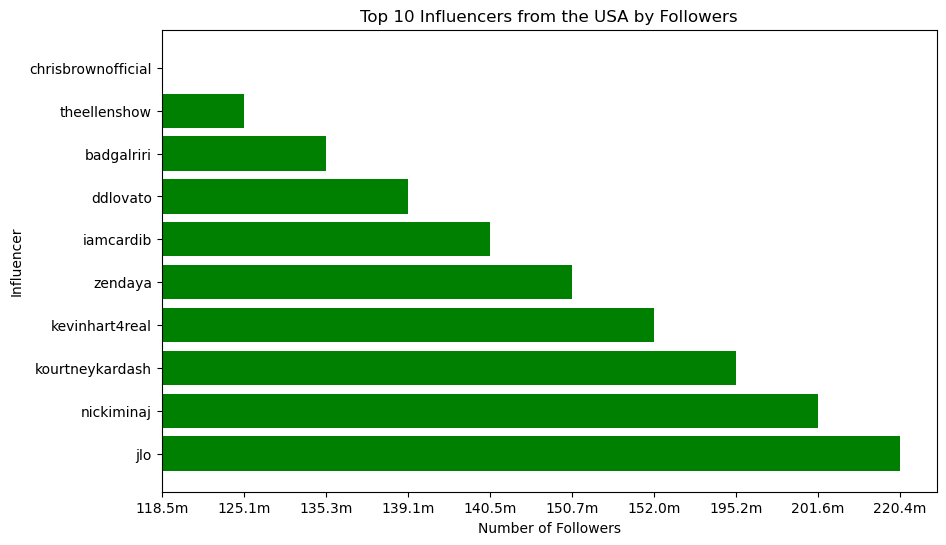

In [14]:
import matplotlib.pyplot as plt

# Create a bar plot for the top 10 influencers
plt.figure(figsize=(10, 6))
plt.barh(top_10_usa_followers['channel_info'], top_10_usa_followers['followers'], color='green')
plt.xlabel('Number of Followers')
plt.ylabel('Influencer')
plt.title('Top 10 Influencers from the USA by Followers')
plt.gca().invert_yaxis()  # Invert y-axis to display the influencer with the most followers at the top
plt.show()


<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 18px; color: black;">STEP 9 - IDENTIFYING THE TOP MOST FOLLOWERS FROM INDIA</strong>
</div>


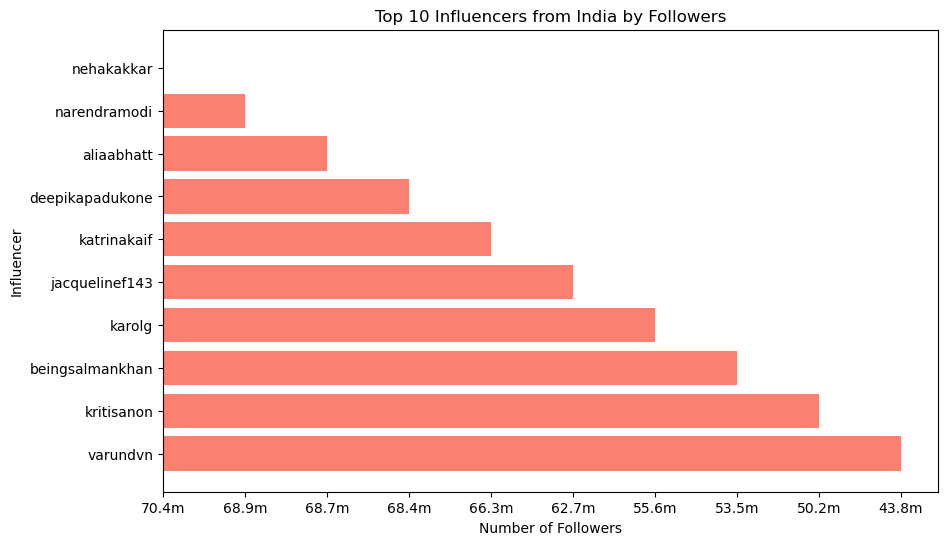

In [15]:
import matplotlib.pyplot as plt

# Filter influencers from India
indian_influencers = df[df['country'] == 'India']

# Sort the Indian influencers by followers in descending order
sorted_indian_influencers = indian_influencers.sort_values(by='followers', ascending=False)

# Take the top 10 influencers with the most followers
top_10_indian_followers = sorted_indian_influencers.head(10)

# Create a bar plot for the top 10 influencers from India
plt.figure(figsize=(10, 6))
plt.barh(top_10_indian_followers['channel_info'], top_10_indian_followers['followers'], color='salmon')
plt.xlabel('Number of Followers')
plt.ylabel('Influencer')
plt.title('Top 10 Influencers from India by Followers')
plt.gca().invert_yaxis()  # Invert y-axis to display the influencer with the most followers at the top
plt.show()


<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 18px; color: black;">STEP 10 - IDENTIFYING THE INFLUENCERS WITH THE MOST LIKES</strong>
</div>


In [17]:

# Function to convert 'k' to thousand and 'm' to million
def convert_to_numeric(value):
    if isinstance(value, float):
        return value
    elif value.endswith('k'):
        return float(value[:-1]) * 1e3
    elif value.endswith('m'):
        return float(value[:-1]) * 1e6
    else:
        return float(value)

# Convert 'avg_likes' to numeric
df['avg_likes'] = df['avg_likes'].apply(convert_to_numeric)

# Sort the DataFrame by 'avg_likes' in descending order
sorted_df = df.sort_values(by='avg_likes', ascending=False)

# Take the top five influencers with the most average likes per post
top_5_avg_likes = sorted_df.head(5)

print("Top 5 influencers with the most average likes per post:")
print(top_5_avg_likes[['channel_info', 'avg_likes']])


Top 5 influencers with the most average likes per post:
     channel_info   avg_likes
102           thv  15400000.0
140           j.m  14200000.0
167         rkive  10900000.0
0       cristiano   8700000.0
32   billieeilish   8500000.0


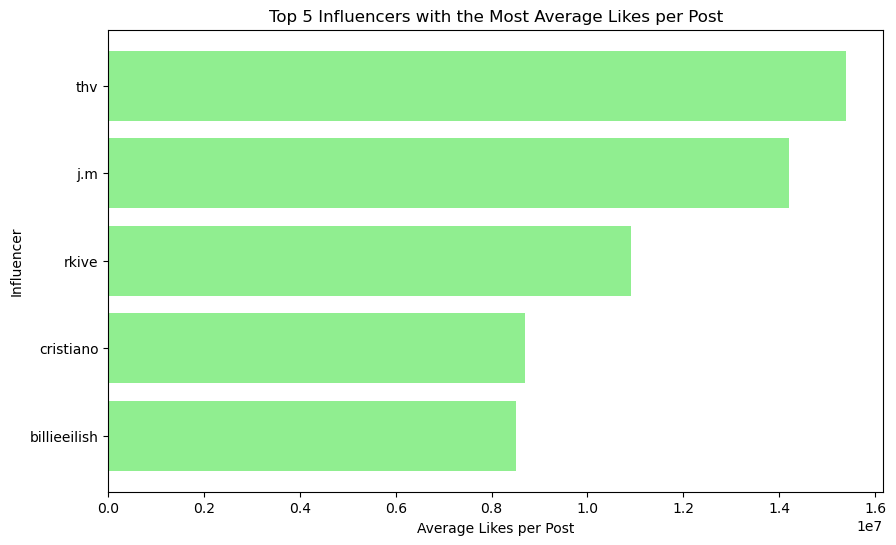

In [18]:
import matplotlib.pyplot as plt

# Create a bar plot for the top 5 influencers with the most average likes per post
plt.figure(figsize=(10, 6))
plt.barh(top_5_avg_likes['channel_info'], top_5_avg_likes['avg_likes'], color='lightgreen')
plt.xlabel('Average Likes per Post')
plt.ylabel('Influencer')
plt.title('Top 5 Influencers with the Most Average Likes per Post')
plt.gca().invert_yaxis()  # Invert y-axis to display the influencer with the most average likes at the top
plt.show()


<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 18px; color: black;">STEP 11 - COMPARING MESSI AND RONALDO: WHO HAS THE MOST LIKED POSTS?</strong>
</div>


In [19]:
# Filter influencers Cristiano Ronaldo and Lionel Messi
cristiano = df[df['channel_info'] == 'cristiano']
messi = df[df['channel_info'] == 'leomessi']

# Get the average likes for new posts for each influencer
cristiano_avg_likes = cristiano['new_post_avg_like'].values[0]
messi_avg_likes = messi['new_post_avg_like'].values[0]

# Compare the average likes for new posts
if cristiano_avg_likes > messi_avg_likes:
    print("Cristiano Ronaldo has more average likes for new posts.")
    print("Average likes for new posts:", cristiano_avg_likes)
elif messi_avg_likes > cristiano_avg_likes:
    print("Lionel Messi has more average likes for new posts.")
    print("Average likes for new posts:", messi_avg_likes)
else:
    print("Both Cristiano Ronaldo and Lionel Messi have the same average likes for new posts.")
    print("Average likes for new posts:", cristiano_avg_likes)


Cristiano Ronaldo has more average likes for new posts.
Average likes for new posts: 6.5m


<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 18px; color: black;">STEP 12 - IDENTIFYING THE TOP 5 COUNTRIES WITH THE MOST INFLUENCERS</strong>
</div>


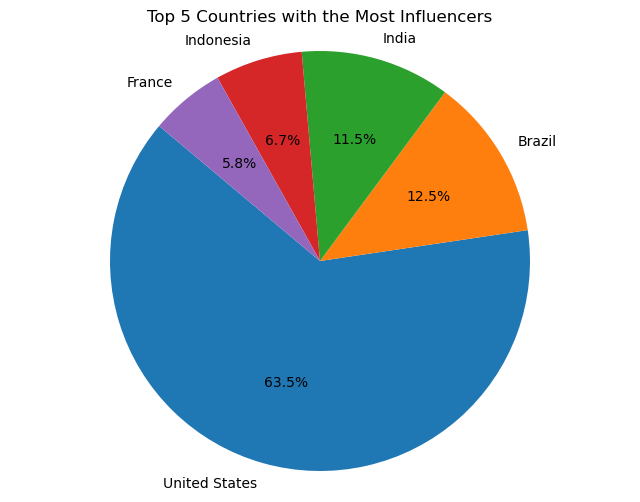

In [20]:
import matplotlib.pyplot as plt

# Count the number of influencers from each country
country_counts = df['country'].value_counts().head(5)

# Create labels and sizes for the pie chart
labels = country_counts.index.tolist()
sizes = country_counts.values.tolist()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Countries with the Most Influencers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 18px; color: black;">CONCLUSION</strong>
</div>



1. **Top Influencers by Influence Score**: The top 10 influencers by influence score were identified, with Cristiano Ronaldo, Kylie Jenner, and Selena Gomez being among the top influencers.

2. **Top Influencers by Country**: The United States, Spain, and Brazil were the top three countries with the most influencers.

3. **Influencers with the Most Posts**: Manchester United was identified as the influencer with the most posts.

4. **Most Popular Influencer from India**: The most popular influencer from India was determined based on influence score.

5. **Top Influencers by Followers**: The top influencers from the USA and India were visualized, showing their follower counts.

6. **Influencers with the Most Average Likes per Post**: The top 5 influencers with the most average likes per post were identified and visualized.

7. **Comparison between Messi and Ronaldo**: A comparison was made between Lionel Messi and Cristiano Ronaldo regarding their average likes on new posts.

8. **Top Countries with the Most Influencers**: The top 5 countries with the most influencers were visualized using a pie chart.


<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 18px; color: black;">INSIGHTS</strong>
</div>




- **Global Top Influencers**: Cristiano Ronaldo, Kylie Jenner, and Selena Gomez are among the top influencers globally, with high influence scores and a large number of followers.

- **Top Countries in the Influencer Market**: The United States dominates the influencer market, followed by Spain and Brazil.

- **Most Active Influencer**: Manchester United stands out as the influencer with the most posts, indicating a strong presence on Instagram.

- **Prominence of Indian Influencers**: Indian influencers are also prominent, with several influencers having a significant influence score.

- **Diverse Landscape**: The USA and India have diverse influencer landscapes, with a wide range of influencers across various niches.


<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 18px; color: black;">RECOMMENDATIONS FOR BRANDS</strong>
</div>


Brands looking to collaborate with influencers should consider the top influencers identified in this analysis for potential partnerships.

Targeting influencers from countries with a large influencer presence, such as the USA and India, can help brands reach a wider audience.

Analyzing the average likes per post can provide insights into influencer engagement and effectiveness in driving audience interaction.

Brands should tailor their influencer marketing strategies based on the preferences and characteristics of their target audience and the influencers' demographics.

Overall, this analysis provides valuable insights into the Instagram influencer landscape, helping brands make informed decisions in their influencer marketing efforts.



<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 24px; color: black;">ANALYSED BY NYANDA JR</strong>
</div>


<div style="background-color: green; text-align: center; padding: 10px;">
    <strong style="font-size: 24px; color: black;">************************************************************************</strong>
</div>
